In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime
import glob
import pickle
from datetime import datetime, timedelta
import sys
from scipy.optimize import curve_fit

#import the folder that has the analysis level class
sys.path.append("../CombinedData/")
sys.path.append("../AnalysisTools/")
import Dataset
import AnalysisTools

In [2]:
toproot = "/p/lustre2/nexouser/data/StanfordData/angelico/hv-test-chamber/"
topdirs = {5:toproot+"Run5/", 6:toproot+"Run6/", 7:toproot+"Run7/", 8:toproot+"Run8/", 9:toproot+"Run9/"}
configs = {5:"../configs/run5_config.yaml", 6:"../configs/run6_config.yaml", 7:"../configs/run7_config.yaml", 8:"../configs/run8_config.yaml", 9:"../configs/run9_config.yaml"}
red_file_name = "combined_reduced.p"
#analysis tools objects, unloaded data
anas = {}
for n in topdirs:
    anas[n] = AnalysisTools.AnalysisTools(topdirs[n]+red_file_name, configs[n])


In [3]:
#load data into mem if you want
for n, ana in anas.items():
    ana.load_dataframe()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ch2 amp                                                         -1.032
ch2 full integral                                            97.170535
ch2 baseline                                                      -0.0
ch2 postbaseline                                              0.169306
ch2 noise                                                     0.301796
                                           ...                        
ch4 nanoseconds                                            484614664.0
ch4 hv                                                        0.111072
ch4 field                                                     0.389726
ch4 filename         /p/lustre2/nexouser/data/StanfordData/angelico...
ch4 evidx                                                           68
Name: 18090, Length: 64, dtype: object


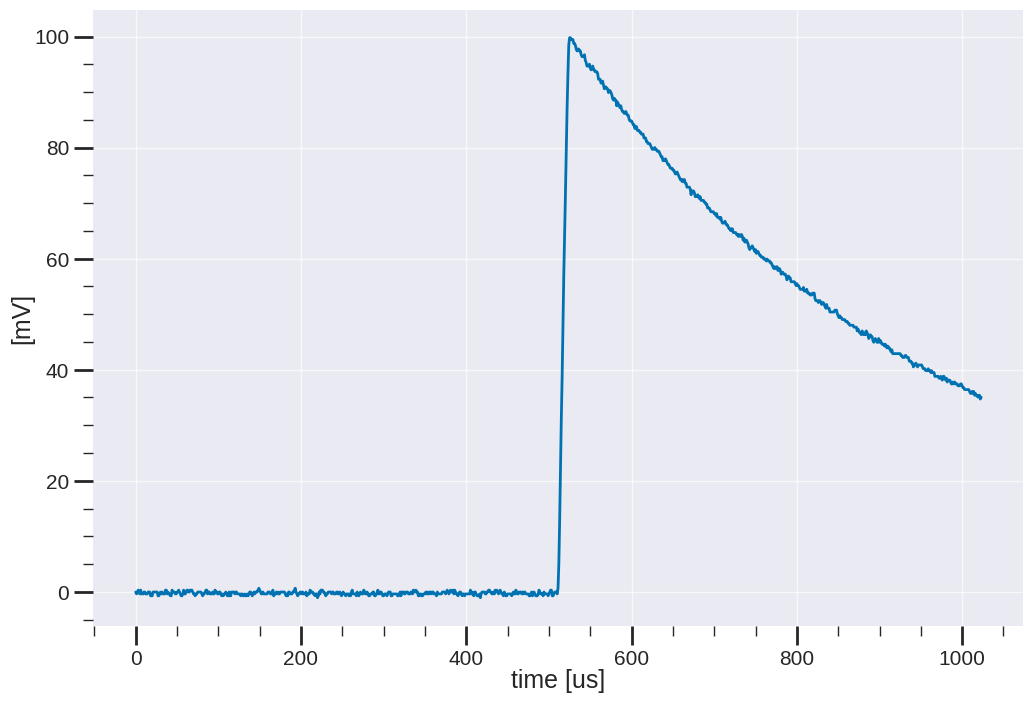

In [9]:
#waveform plotting tool (not tested, need cluster where all prereduced data sits. )
#for run, ana in anas.items():
d = anas[7].df
d = d[~d["ch3 charge"].isna()]
#timesearch = datetime.timestamp(datetime(2023, 10, 4, 17, 53, 0))
mask = (np.abs(d["ch3 charge"]) < 1) & (np.abs(d["ch3 charge"]) > 0.75) & (d["ch3 hv"] < 5)
sw_chs = [3]
dd = d[mask]

#events = ana.get_waveforms_from_cuts(mask, sw_chs)[3]
events = ana.get_waveforms_from_df(dd, sw_chs)[3]
#n = 1
#idxs = np.random.choice(range(len(events)), n)
for i in range(len(events)):
    ev = events[i]
    fig, ax = plt.subplots()
    ax.plot(range(len(ev["Data"])), ev["Data"])

    ax.legend()
    ax.set_xlabel("time [us]")
    ax.set_ylabel('[mV]')
    #ax.set_title("charge: {:.2f} pC, amp: {:.1f} mV, energy: {:.1f} pJ, hv: {:.1f} kV".format()
    plt.show()